In [6]:
import torch
import numpy as np
import datasets
from pathlib import Path
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer
import transformers
from transformers import GPT2Tokenizer, GPT2Model
import os 


In [ ]:


LuceneSearcher.list_prebuilt_indexes()

from pyserini.index.lucene import IndexReader
IndexReader.list_prebuilt_indexes()

searcher = LuceneSearcher.from_prebuilt_index('robust04')

index_reader = IndexReader.from_prebuilt_index('robust04')
index_reader.stats()


In [ ]:
from pyserini.search.lucene import LuceneSearcher

searcher = LuceneSearcher.from_prebuilt_index('wikipedia-dpr-100w')
hits = searcher.search('what is a lobster roll?')

for i in range(0, 10):
    print(f'{i+1:2} {hits[i].docid:7} {hits[i].score:.5f}')
    print (wiki_retrieval['train'][hits[i].docid]['text'])


In [7]:
data_path = '/datastor1/pbansal/huggingface_cache'

datasets.config.DOWNLOADED_DATASETS_PATH = Path(data_path)
datasets.config.HF_DATASETS_CACHE = Path(data_path)


# msmarco = datasets.load_dataset('ms_marco','v2.1')



In [8]:
import datasets
wikitext = datasets.load_dataset('wikitext','wikitext-103-v1')

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [ ]:
wikitext['test']['text']

In [9]:
# model = AutoModel.from_pretrained('facebook/contriever-msmarco')


model = GPT2Model.from_pretrained('gpt2',cache_dir=data_path)
model = GPT2Model.from_pretrained('gpt2-medium',cache_dir=data_path)
model = GPT2Model.from_pretrained('gpt2-large',cache_dir=data_path)
model = GPT2Model.from_pretrained('gpt2-xl',cache_dir=data_path)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2',cache_dir=data_path)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

In [40]:
model = GPT2Model.from_pretrained('gpt2',cache_dir=data_path)


In [43]:
tokenized_inputs = tokenizer([wiki_retrieval['train'][0]['text']],truncation=True,max_length=256,padding='max_length',return_tensors='pt')['input_ids']


In [65]:
a = [torch.zeros((100,10)) for _ in range(10)]
a[0][np.arange(10)] = torch.ones((10,10))

In [67]:
a[1]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [68]:
model(tokenized_inputs,output_hidden_states=True)['hidden_states'][0],model(tokenized_inputs,output_hidden_states=True)['hidden_states'][-1].shape



(tensor([[[-0.1289, -0.2367,  0.0371,  ..., -0.1794,  0.0433,  0.0998],
          [-0.0217, -0.2451, -0.0206,  ..., -0.0054, -0.0549, -0.1998],
          [ 0.0223,  0.0064,  0.1222,  ..., -0.0321,  0.0693, -0.0366],
          ...,
          [ 0.0389, -0.0279,  0.0127,  ...,  0.0855,  0.0063,  0.0399],
          [ 0.0430, -0.0378,  0.0040,  ...,  0.0878,  0.0053,  0.0464],
          [ 0.0352, -0.0288, -0.0009,  ...,  0.0861,  0.0043,  0.0410]]],
        grad_fn=<AddBackward0>),
 torch.Size([1, 256, 768]))

In [62]:
model(tokenized_inputs,output_hidden_states=True)['past_key_values'][0][0]

torch.Size([1, 12, 256, 64])

In [12]:
wiki_retrieval = datasets.load_dataset('wiki_dpr','psgs_w100.multiset.no_index.no_embeddings')

Generating train split: 0 examples [00:00, ? examples/s]

In [14]:
model = AutoModel.from_pretrained('bert-base-uncased',cache_dir=data_path)
model = AutoModel.from_pretrained('bert-large-uncased',cache_dir=data_path)
model = AutoModel.from_pretrained('roberta-base',cache_dir=data_path)
model = AutoModel.from_pretrained('roberta-large',cache_dir=data_path)


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased',cache_dir=data_path)
tokenizer


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [16]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base',cache_dir=data_path)
tokenizer


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [44]:
# tokenizer = AutoTokenizer.from_pretrained("facebook/contriever")

# encoded_datasets = msmarco.map(lambda examples: tokenizer(examples['query']), batched=True)
# print ('Tokenized Dataset')

# encoded_datasets.save_to_disk('/var/local/pbansal/huggingface/queries_msmarco_tokenizer_contriever')


encoded_datasets = msmarco.map(lambda examples: tokenizer(examples['query']), batched=True)
print ('Tokenized Dataset')

encoded_datasets.save_to_disk('/var/local/pbansal/huggingface/queries_msmarco_tokenizer_gpt2xl')



vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Map:   0%|          | 0/101093 [00:00<?, ? examples/s]

Map:   0%|          | 0/808731 [00:00<?, ? examples/s]

Map:   0%|          | 0/101092 [00:00<?, ? examples/s]

Tokenized Dataset


Saving the dataset (0/1 shards):   0%|          | 0/101093 [00:00<?, ? examples/s]

Saving the dataset (0/8 shards):   0%|          | 0/808731 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/101092 [00:00<?, ? examples/s]

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl',cache_dir='/var/local/pbansal/huggingface/')

tokenizer

GPT2Tokenizer(name_or_path='gpt2-xl', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [4]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2',cache_dir='/var/local/pbansal/huggingface/')

tokenizer

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [6]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium',cache_dir='/var/local/pbansal/huggingface/')

tokenizer

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

GPT2Tokenizer(name_or_path='gpt2-medium', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [34]:
len(filtered_queries)

503370

In [46]:
a = datasets.load_from_disk('/var/local/pbansal/huggingface/queries_msmarco_tokenizer_gpt2xl')

[8,
 10919,
 373,
 262,
 7103,
 2928,
 286,
 262,
 1943,
 286,
 262,
 582,
 12904,
 1628,
 30]

In [ ]:
len([x['query'] for x in msmarco['train'] if len(x['wellFormedAnswers'])>0])

(array([6.84895e+05, 1.18274e+05, 4.84900e+03, 6.02000e+02, 1.04000e+02,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  5. ,  47.4,  89.8, 132.2, 174.6, 217. , 259.4, 301.8, 344.2,
        386.6, 429. ]),
 <BarContainer object of 10 artists>)

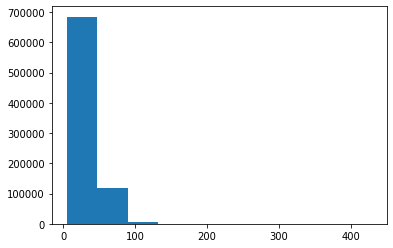

In [25]:

plt.hist([len(x) for x in msmarco['train']['query']])